# 特異値分解

ここでは特異値分解を視覚的に表示するプログラムが書かれています。

ぜひプログラム内の値を変更してみてください。

## 注意事項

- 「Googleへのログインが必要」と出たら、自分のGoogleアカウントでログインします。

- 「警告: このノートブックは Google が作成したものではありません。」と出たら「このまま実行」をクリックします。

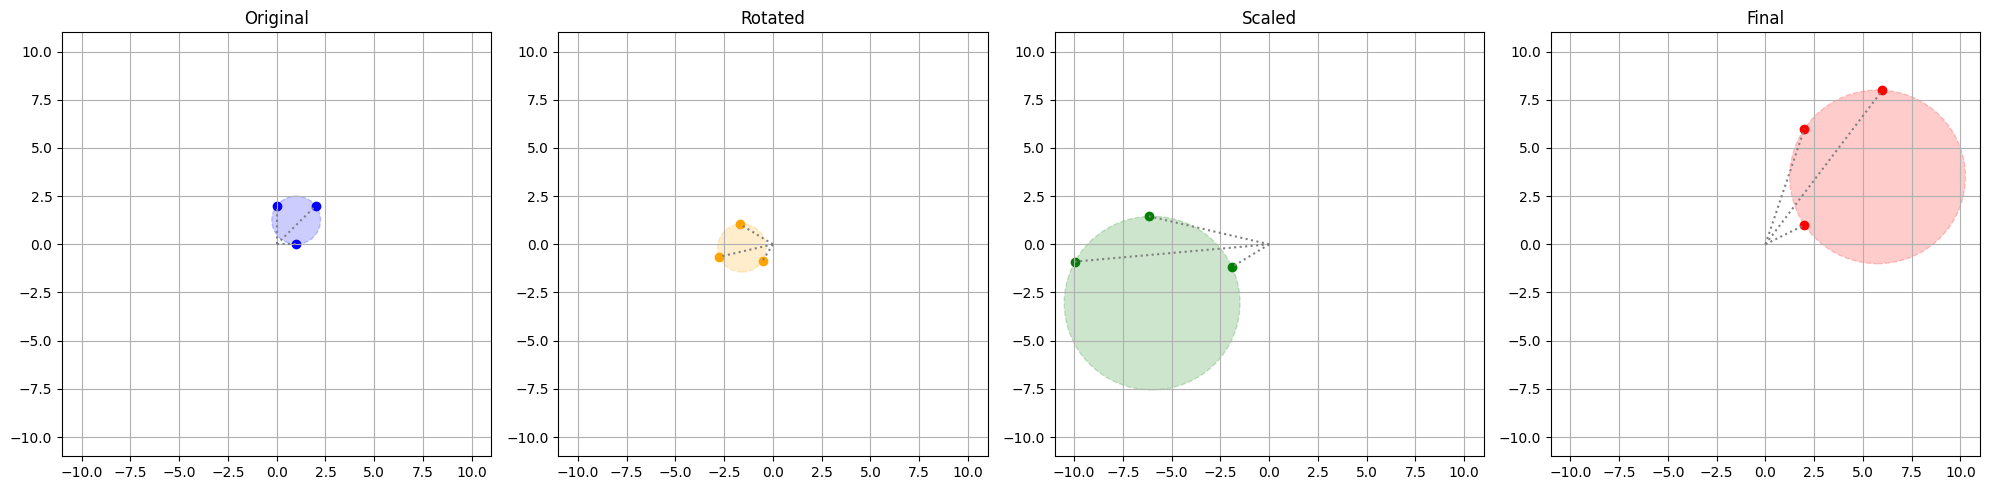

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 3点の座標とSVD行列
points = np.array([[1, 0], [0, 2], [2, 2]])
A = np.array([[2, 1], [1, 3]])

# SVD変換のステップを計算
U, S, VT = np.linalg.svd(A)
steps = [
    points,
    points @ VT.T,
    points @ VT.T @ np.diag(S),
    points @ VT.T @ np.diag(S) @ U.T
]
titles = ["Original", "Rotated", "Scaled", "Final"]
colors = ['blue', 'orange', 'green', 'red']

# プロット作成
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for ax, data, title, color in zip(axes, steps, titles, colors):
    # 点と原点からの線を描画
    for x, y in data:
        ax.plot([0, x], [0, y], 'gray', linestyle=':')
    ax.scatter(data[:, 0], data[:, 1], color=color)
    
    # 3点を通る円を描画
    x1, y1 = data[0]
    x2, y2 = data[1]
    x3, y3 = data[2]
    
    # 円の中心と半径を計算
    A = 2 * (x2 - x1)
    B = 2 * (y2 - y1)
    C = x2**2 + y2**2 - x1**2 - y1**2
    D = 2 * (x3 - x2)
    E = 2 * (y3 - y2)
    F = x3**2 + y3**2 - x2**2 - y2**2
    
    center_x = (C * E - F * B) / (A * E - B * D)
    center_y = (A * F - D * C) / (A * E - B * D)
    radius = np.sqrt((x1 - center_x)**2 + (y1 - center_y)**2)
    
    circle = plt.Circle((center_x, center_y), radius, 
                       edgecolor=color, facecolor=color,
                       alpha=0.2, linestyle='--')
    ax.add_patch(circle)
    
    # グラフの設定
    ax.set_title(title)
    ax.grid(True)
    ax.set_xlim(-11, 11)
    ax.set_ylim(-11, 11)

plt.tight_layout()
plt.show()